In [1]:
## 下面定义的walk会使用对称的形式以保证chiral的对称性
import numpy as np 
import matplotlib.pyplot as plt
 
def carry(state, theta):
	'''
	carry U operatior on state
	suppose U=exp(-i*theta/2*sigmay)
	'''
	U = np.array([[np.cos(theta/2), -np.sin(theta/2)],[np.sin(theta/2), np.cos(theta/2)]])
	final_state = np.dot(U, state)

	return final_state

def blue_carry(state, theta):
	'''
	blue carry U on state
	suppose U=exp(-i*theta/2*sigmay)
	and |0>-->|1>,phonon number plus 1
	|1>-->|0>, phonon number minus 1
	'''
	# U operator on up and down level of state
	state_up = np.vstack((state[0], np.zeros(len(state[0]))))
	state_down = np.vstack((np.zeros(len(state[0])), state[1]))
	U = np.array([[np.cos(theta/2), -np.sin(theta/2)], [np.sin(theta/2), np.cos(theta/2)]])
	carry_state_up = np.dot(U, state_up)
	carry_state_down = np.dot(U, state_down)
	# after U operation, down level minus 1
	up_state = carry_state_up[0]
	down_state_minus = carry_state_up[1]
	down_state_minus_0 = state_up[0][0]  # blue carry can not drive the phonon=0 && up level
	down_state_minus = np.delete(down_state_minus, 0)
	down_state_minus = np.insert(down_state_minus, len(down_state_minus)-1, 0)
	# after U operation, up level plus 1
	up_state_plus = carry_state_down[0]
	down_state = carry_state_down[1]
	up_state_plus = np.insert(up_state_plus, 0, down_state_minus_0)
	up_state_plus = np.delete(up_state_plus, len(up_state_plus)-1)
	# probability add up and down level
	up = up_state + up_state_plus
	down = down_state_minus + down_state
	final_state = np.vstack((up, down))

	return final_state

def red_carry(state, theta):
	'''
	red carry U on state
	suppose U=exp(-i*theta/2*sigmay)
	and |0>-->|1>,phonon number minus 1
	|1>-->|0>, phonon number plus 1
	'''
	# U operator on up and down level of state
	state_up = np.vstack((state[0], np.zeros(len(state[0]))))
	state_down = np.vstack((np.zeros(len(state[0])), state[1]))
	U = np.array([[np.cos(theta/2), -np.sin(theta/2)],[np.sin(theta/2), np.cos(theta/2)]])
	carry_state_up = np.dot(U, state_up)
	carry_state_down = np.dot(U, state_down)
	# after U operation, up level minus 1
	up_state_minus = carry_state_down[0]
	down_state = carry_state_down[1]
	up_state_minus_0 = state_down[1][0] # red carry can not drive the phonon=0 && down level
	up_state_minus = np.delete(up_state_minus,0)
	up_state_minus = np.insert(up_state_minus,len(up_state_minus)-1,0)
	# after U operation, down level plus 1
	up_state = carry_state_up[0]
	down_state_plus = carry_state_up[1]
	down_state_plus = np.insert(down_state_plus,0,up_state_minus_0)
	down_state_plus = np.delete(down_state_plus,len(down_state_plus)-1)
	# probability add up and down level
	up = up_state + up_state_minus
	down = down_state_plus + down_state
	final_state = np.vstack((up, down))

	return final_state

def Operator(up_state, down_state, func, theta):
	'''
	operator include carry, blue and red
	'''
	state = np.vstack((up_state, down_state))
	state = func(state, theta)
	return state[0], state[1]


def one_step(state, theta_1, theta_2):
	'''
	one step of complete quantum walk
	may with the help of auxiliary level
	input state of three level
	output state of three level
	T1:up-->right
	t2:down-->left 
	r2T1R1T2r2  r2=sqrt(R2)
	'''
	up_state = state[0]
	down_state = state[1]
	aux_state = state[2]
	up_state, down_state = Operator(up_state, down_state, carry, theta_2/2)
	aux_state, down_state = Operator(aux_state, down_state, red_carry, np.pi)
	up_state, down_state = Operator(up_state, down_state, carry, np.pi)
	aux_state, down_state = Operator(aux_state, down_state, carry, theta_1)
	up_state, down_state = Operator(up_state, down_state, blue_carry, np.pi)
	aux_state, down_state = Operator(aux_state, down_state, carry, np.pi)
	up_state, down_state = Operator(up_state, down_state, carry, theta_2/2)

	state = np.vstack((up_state, down_state, aux_state))
	return state

def N_step(state, theta_1, theta_2, N):
	'''
	N step of complete quantum walk
	'''
	for i in range(N):
		state = one_step(state, theta_1, theta_2)
	return state



## 破缺PHS

def carry_k(state, theta, chi):
	'''
	carry U operatior on state
	suppose U=exp(-i*theta/2*sigmaz)
	'''
	U = np.array([[np.cos(theta/2)-1j*np.sin(theta/2)*np.sin(chi), -np.sin(theta/2)*np.cos(chi)],[np.sin(theta/2)*np.cos(chi), np.cos(theta/2)+1j*np.sin(theta/2)*np.sin(chi)]])
	final_state = np.dot(U, state)

	return final_state

def Operator_k(up_state, down_state, theta, chi):
	'''
	operator include carry, blue and red
	'''
	state = np.vstack((up_state, down_state))
	state = carry_k(state, theta, chi)

	return state[0], state[1]

def one_step_k(state, theta_1, theta_2, chi):
	'''
	one step of complete quantum walk
	may with the help of auxiliary level
	input state of three level
	output state of three level
	T1:up-->right
	t2:down-->left 
	r2T1R1T2r2
	'''
	up_state = state[0]
	down_state = state[1]
	aux_state = state[2]
	up_state, down_state = Operator(up_state, down_state, carry, theta_2/2)
	aux_state, down_state = Operator(aux_state, down_state, red_carry, np.pi)
	up_state, down_state = Operator(up_state, down_state, carry, np.pi)
	aux_state, down_state = Operator_k(aux_state, down_state, theta_1, chi)
	up_state, down_state = Operator(up_state, down_state, blue_carry, np.pi)
	aux_state, down_state = Operator(aux_state, down_state, carry, np.pi)
	up_state, down_state = Operator(up_state, down_state, carry, theta_2/2)

	state = np.vstack((up_state, down_state, aux_state))
	return state

def N_step_k(state, theta_1, theta_2, chi, N):
	'''
	N step of complete quantum walk
	'''
	for i in range(N):
		state = one_step_k(state, theta_1, theta_2, chi)
	return state

def one_step_K(state, theta_1, theta_2, chi):
	'''
	one step of complete quantum walk
	may with the help of auxiliary level
	input state of three level
	output state of three level
	T1:up-->right
	t2:down-->left 
	r2T1R1T2r2
	'''
	up_state = state[0]
	down_state = state[1]
	aux_state = state[2]
	up_state, down_state = Operator_k(up_state, down_state, theta_2/2, chi)
	aux_state, down_state = Operator(aux_state, down_state, red_carry, np.pi)
	up_state, down_state = Operator(up_state, down_state, carry, np.pi)
	aux_state, down_state = Operator_k(aux_state, down_state, theta_1, chi)
	up_state, down_state = Operator(up_state, down_state, blue_carry, np.pi)
	aux_state, down_state = Operator(aux_state, down_state, carry, np.pi)
	up_state, down_state = Operator_k(up_state, down_state, theta_2/2, chi)

	state = np.vstack((up_state, down_state, aux_state))
	return state

def N_step_K(state, theta_1, theta_2, chi, N):
	'''
	N step of complete quantum walk
	'''
	for i in range(N):
		state = one_step_K(state, theta_1, theta_2, chi)
	return state


# 有PHS和CS保护的情况

In [2]:
M = 100

up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M
down_state[0] = 1

np.array(up_state)
np.array(down_state)
np.array(aux_state)
init_state = np.vstack((up_state, down_state, aux_state))

theta_1 = np.linspace(-2*np.pi, 2*np.pi, 201)
theta_2 = np.pi/2
p = np.zeros(201)

for i,theta in enumerate(theta_1):
    state = N_step(init_state, theta, theta_2, N=50)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p[i] = P[0] + P[1] 


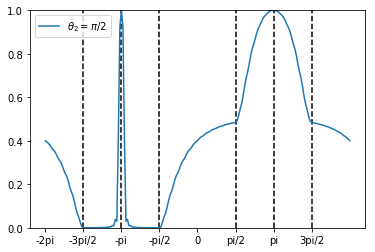

In [3]:
plt.plot(theta_1, p, label='$ \\theta_2 = \pi/2$')
plt.ylim(top = 1,bottom = 0)
my_x_ticks = np.arange(-2*np.pi,2*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('-2pi','-3pi/2','-pi','-pi/2','0','pi/2','pi','3pi/2','2pi'))
plt.vlines(-3*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(-np.pi, 0, 1, linestyles = "dashed")
plt.vlines(-np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed")
plt.legend(loc='best') 

# 破缺PHS

In [187]:
M = 100

up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M
down_state[0] = 1



np.array(up_state)
np.array(down_state)
np.array(aux_state)
init_state = np.vstack((up_state, down_state, aux_state))

# chi = np.pi/100
Chi = np.linspace(0, np.pi, 25)
theta_1 = np.linspace(-2*np.pi, 2*np.pi, 201)
theta_2 = np.pi/2

# p_k = np.zeros(201)
p_k = np.zeros((25, 201))

# for i,theta in enumerate(theta_1):
#     state = N_step_k(init_state, theta, theta_2, chi, N=50)
#     P_k = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
#     p_k[i] = P_k[0] + P_k[1] 
    
for i,chi in enumerate(Chi):
        for j,theta in enumerate(theta_1):
            state = N_step_k(init_state, theta_2, theta, chi, N=50)
            P_k = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
            p_k[i][j] = P_k[0] + P_k[1] 

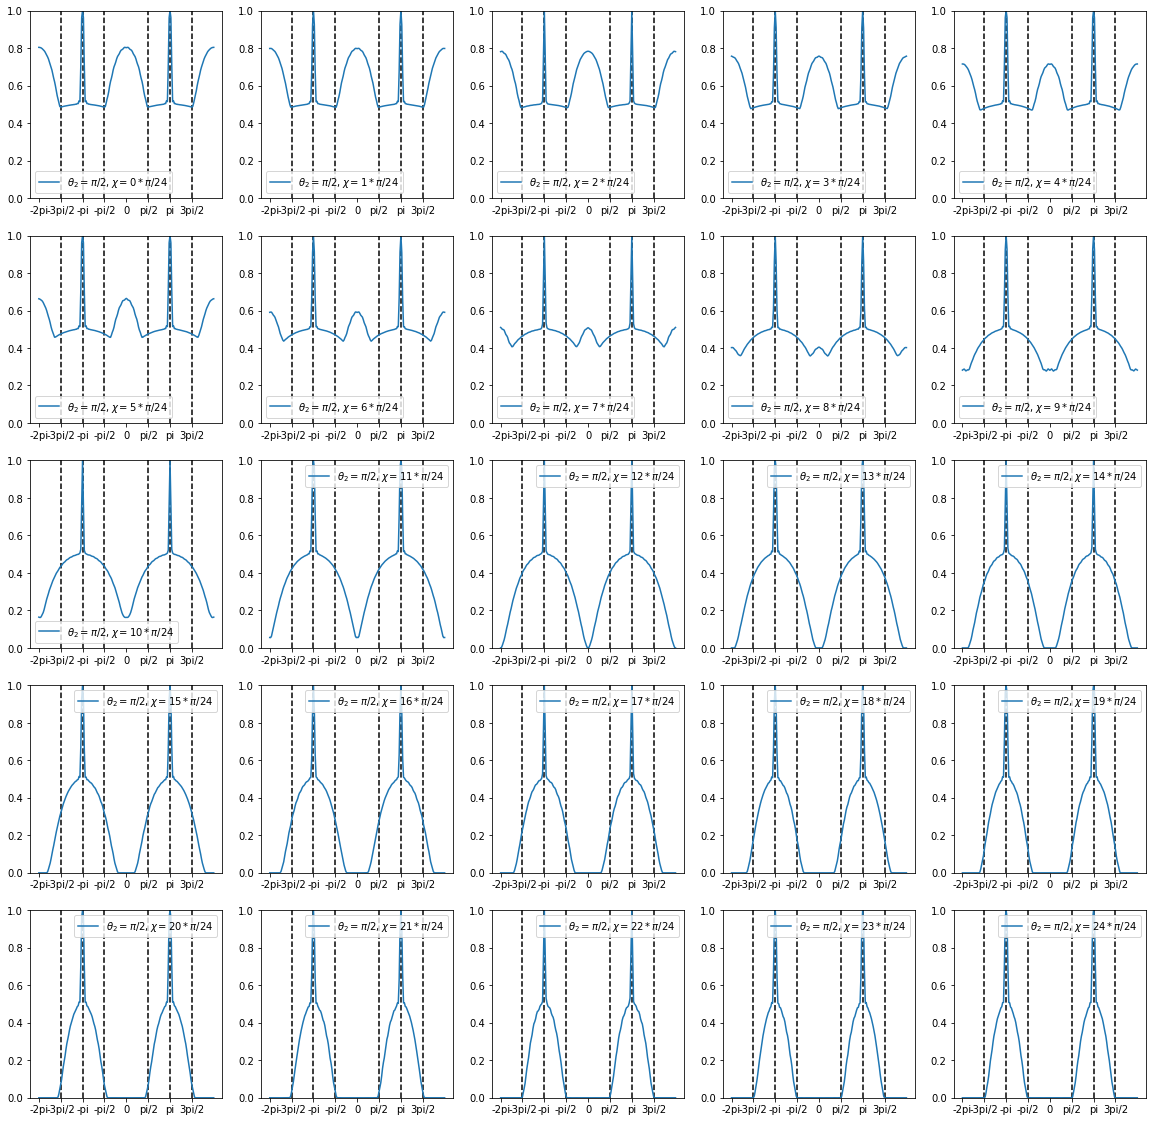

In [188]:
# plt.plot(theta_1, p_k, label='$ \\theta_2 = \pi/2$')
# plt.ylim(top = 1,bottom = 0)
# my_x_ticks = np.arange(-2*np.pi,2*np.pi,np.pi/2) 
# plt.xticks(my_x_ticks,('-2pi','-3pi/2','-pi','-pi/2','0','pi/2','pi','3pi/2','2pi'))
# plt.vlines(-3*np.pi/2, 0, 1, linestyles = "dashed")
# plt.vlines(-np.pi, 0, 1, linestyles = "dashed")
# plt.vlines(-np.pi/2, 0, 1, linestyles = "dashed")
# plt.vlines(np.pi/2, 0, 1, linestyles = "dashed")
# plt.vlines(np.pi, 0, 1, linestyles = "dashed")
# plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed")
# plt.legend(loc='best') 
plt.figure(figsize=(20,20))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.plot(theta_1, p_k[i], label='$ \\theta_2 = \pi/2 ,\\chi = %d *\pi/24 $'%(int(i)))
    plt.ylim(top = 1,bottom = 0)
    my_x_ticks = np.arange(-2*np.pi,2*np.pi,np.pi/2) 
    plt.xticks(my_x_ticks,('-2pi','-3pi/2','-pi','-pi/2','0','pi/2','pi','3pi/2','2pi'))
    plt.vlines(-3*np.pi/2, 0, 1, linestyles = "dashed")
    plt.vlines(-np.pi, 0, 1, linestyles = "dashed")
    plt.vlines(-np.pi/2, 0, 1, linestyles = "dashed")
    plt.vlines(np.pi/2, 0, 1, linestyles = "dashed")
    plt.vlines(np.pi, 0, 1, linestyles = "dashed")
    plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed")
    plt.legend(loc='best') 
plt.savefig('PHS')

# 破缺PHS 2

In [72]:
M = 100

up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M
down_state[0] = 1

np.array(up_state)
np.array(down_state)
np.array(aux_state)
init_state = np.vstack((up_state, down_state, aux_state))

# chi = np.pi/100
Chi = np.linspace(0, np.pi, 25)
theta_1 = np.linspace(-2*np.pi, 2*np.pi, 201)
theta_2 = np.pi/2

# p_k = np.zeros(201)
p_K = np.zeros((25, 201))

# for i,theta in enumerate(theta_1):
#     state = N_step_k(init_state, theta, theta_2, chi, N=50)
#     P_k = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
#     p_k[i] = P_k[0] + P_k[1] 
    
for i,chi in enumerate(Chi):
        for j,theta in enumerate(theta_1):
            state = N_step_K(init_state, theta, theta_2, chi, N=50)
            P_K = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
            p_K[i][j] = P_K[0] + P_K[1] 

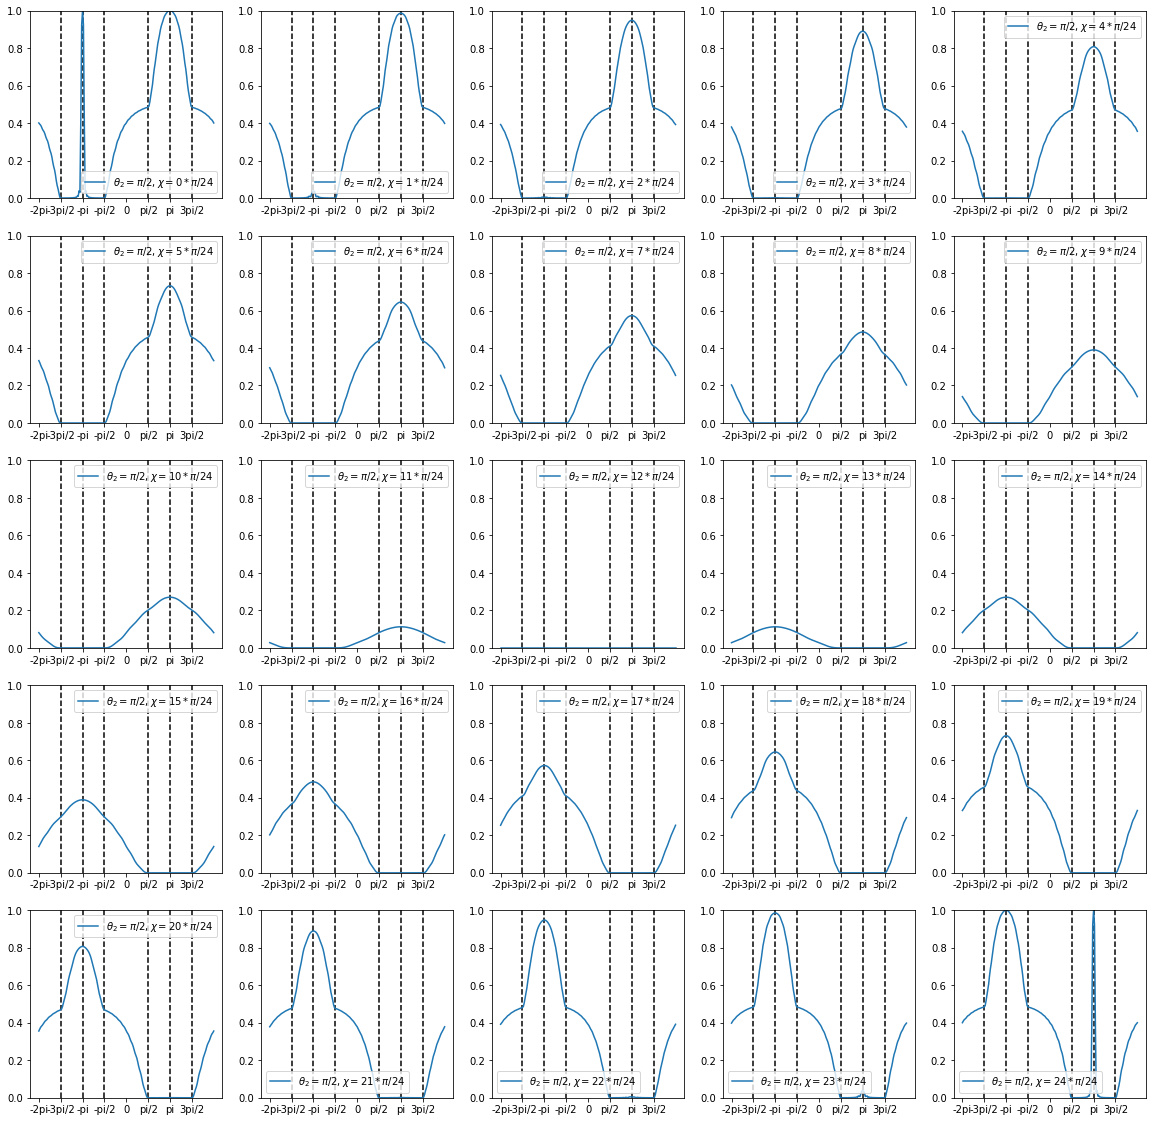

In [73]:
plt.figure(figsize=(20,20))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.plot(theta_1, p_K[i], label='$ \\theta_2 = \pi/2 ,\\chi = %d *\pi/24 $'%(int(i)))
    plt.ylim(top = 1,bottom = 0)
    my_x_ticks = np.arange(-2*np.pi,2*np.pi,np.pi/2) 
    plt.xticks(my_x_ticks,('-2pi','-3pi/2','-pi','-pi/2','0','pi/2','pi','3pi/2','2pi'))
    plt.vlines(-3*np.pi/2, 0, 1, linestyles = "dashed")
    plt.vlines(-np.pi, 0, 1, linestyles = "dashed")
    plt.vlines(-np.pi/2, 0, 1, linestyles = "dashed")
    plt.vlines(np.pi/2, 0, 1, linestyles = "dashed")
    plt.vlines(np.pi, 0, 1, linestyles = "dashed")
    plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed")
    plt.legend(loc='best') 
plt.savefig('PHS2')

In [180]:
from ipywidgets import interact, interactive, fixed, interact_manual 
import ipywidgets as widgets 

import matplotlib.pyplot as plt 
%matplotlib inline 

import numpy as np 

M = 100

up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M
down_state[0] = 1

np.array(up_state)
np.array(down_state)
np.array(aux_state)
init_state = np.vstack((up_state, down_state, aux_state))

plt.figure()

def plot_func(n, theta_1, theta_2, chi):
    n = int(n)
    state = N_step_K(init_state, theta_1, theta_2, chi, N=n)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2 
    phonon = np.arange(0, len(P)) 
    plt.bar(phonon ,P) 
    plt.xlim(0,50)
    plt.ylim(0,1)

interact(plot_func, n = widgets.FloatSlider(value=0, 
               min=0, 
               max=89, 
               step=1),theta_1 = widgets.FloatSlider(value=np.pi/2, 
               min=-2*np.pi, 
               max=2*np.pi, 
               step=0.05*np.pi),theta_2 =widgets.FloatSlider(value=np.pi/2, 
               min=-2*np.pi, 
               max=2*np.pi, 
               step=0.01),chi = widgets.FloatSlider(value=np.pi/2, 
               min=0, 
               max=np.pi)) 
plt.show()

<Figure size 432x288 with 0 Axes>

interactive(children=(FloatSlider(value=0.0, description='n', max=89.0, step=1.0), FloatSlider(value=1.5707963…

In [51]:
from ipywidgets import interact, interactive, fixed, interact_manual 
import ipywidgets as widgets 

import matplotlib.pyplot as plt 
%matplotlib inline 

import numpy as np 

M = 100

up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M
down_state[0] = 1

np.array(up_state)
np.array(down_state)
np.array(aux_state)
init_state = np.vstack((up_state, down_state, aux_state))

plt.figure()

def plot_func(n, theta_1, theta_2):
    n = int(n)
    state1 = N_step(init_state, theta_1, theta_2, N=n)
    P1 = abs(state1[0])**2 
    P2 = abs(state1[1])**2
    state2 = N_step(init_state, theta_1, -theta_2, N=n)
    P3 = abs(state2[0])**2 
    P4 = abs(state2[1])**2
    plt.figure(figsize=(8,8))
    plt.subplot(2,2,1)
    phonon = np.arange(0, len(P1)) 
    plt.bar(phonon ,P1) 
    plt.xlim(0,10)
    plt.ylim(0,1)
    plt.subplot(2,2,2)
    phonon = np.arange(0, len(P1)) 
    plt.bar(phonon ,P2)
    plt.xlim(0,10)
    plt.ylim(0,1)
    plt.subplot(2,2,3)
    phonon = np.arange(0, len(P1)) 
    plt.bar(phonon ,P3)
    plt.xlim(0,10)
    plt.ylim(0,1)
    plt.subplot(2,2,4)
    phonon = np.arange(0, len(P1)) 
    plt.bar(phonon ,P4)
    plt.xlim(0,10)
    plt.ylim(0,1)
    
interact(plot_func, n = widgets.FloatSlider(value=0, 
               min=0, 
               max=89, 
               step=1),theta_1 = widgets.FloatSlider(value=np.pi/4, 
               min=-2*np.pi, 
               max=2*np.pi, 
               step=0.05*np.pi),theta_2 =widgets.FloatSlider(value=np.pi/3, 
               min=-2*np.pi, 
               max=2*np.pi, 
               step=0.01),chi = widgets.FloatSlider(value=np.pi/2, 
               min=0, 
               max=np.pi)) 
plt.show()

<Figure size 432x288 with 0 Axes>

interactive(children=(FloatSlider(value=0.0, description='n', max=89.0, step=1.0), FloatSlider(value=0.7853981…

# 边缘态的建立与消退

In [336]:
# def N_step_destruc(state, theta_1, theta_2, chi, N_1, N_2):
#     for i in range(N_1):
#         state = one_step(state, theta_1, theta_2)
#     state_1 = state
#     for i in range(N_2):
#         state_1 = one_step_k(state_1, theta_1, theta_2, chi)
#     return state_1

# def N_step_found(state, theta_1, theta_2, chi, N_1, N_2):
#     for i in range(N_1):
#         state = one_step_k(state, theta_1, theta_2, chi)
#     state_1 = state
#     for i in range(N_2):
#         state_1 = one_step(state_1, theta_1, theta_2)
#     return state_1

def N_step_destruc(state, theta_1, theta_2, N_1, N_2):
    for i in range(N_1):
        state = one_step(state, theta_1, theta_2)
    state_1 = state
    for i in range(N_2):
        state_1 = one_step(state_1, theta_1, -theta_2)
    return state_1

# def N_step_found(state, theta_1, theta_2, N_1, N_2):
    for i in range(N_1):
        state = one_step(state, -theta_1, theta_2)
    state_1 = state
    for i in range(N_2):
        state_1 = one_step(state_1, theta_1, theta_2)
    return state_1

## 讨论的是相图上平行与y轴两条线相互转移，可以看出0和$\pi$不能相互转换

In [347]:
M = 100

p1 = np.zeros(101)
p2 = np.zeros(101)

up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M

down_state[0] = 1

# chi = np.pi/3
theta_1 = np.linspace(-2*np.pi,2*np.pi,101)
theta_2 = np.pi/2

np.array(up_state)
np.array(down_state)
np.array(aux_state)
init_state = np.vstack((up_state, down_state, aux_state))

for i,theta in enumerate(theta_1):
    state1 = N_step_destruc(init_state, theta, theta_2, N_1=10, N_2=50)
    state2 = N_step_destruc(init_state, theta, -theta_2, N_1=10, N_2=50)

    P1 = abs(state1[0])**2 + abs(state1[1])**2 + abs(state1[2])**2
    P2 = abs(state2[0])**2 + abs(state2[1])**2 + abs(state2[2])**2
    
    p1[i] = P1[0] + P1[1] 
    p2[i] = P2[0] + P2[1] 
    

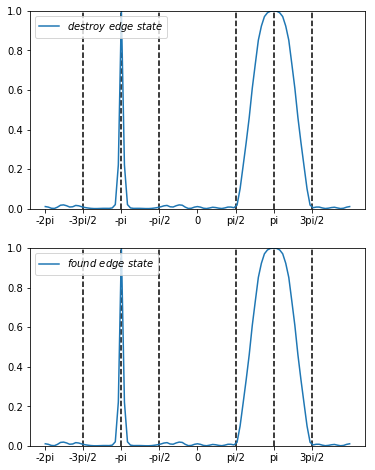

In [349]:
plt.figure(figsize=(6,8))

plt.subplot(2,1,1)
plt.plot(theta_1, p1, label='$ destroy\ edge\ state$')
plt.ylim(top = 1,bottom = 0)
my_x_ticks = np.arange(-2*np.pi,2*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('-2pi','-3pi/2','-pi','-pi/2','0','pi/2','pi','3pi/2','2pi'))
plt.vlines(-3*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(-np.pi, 0, 1, linestyles = "dashed")
plt.vlines(-np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed")
plt.legend(loc='best') 

plt.subplot(2,1,2)
plt.plot(theta_1, p2, label='$ found\ edge\ state$')
plt.ylim(top = 1,bottom = 0)
my_x_ticks = np.arange(-2*np.pi,2*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('-2pi','-3pi/2','-pi','-pi/2','0','pi/2','pi','3pi/2','2pi'))
plt.vlines(-3*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(-np.pi, 0, 1, linestyles = "dashed")
plt.vlines(-np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed")
plt.legend(loc='best') 
plt.savefig('phshh')

# 边缘态的建立与消失2

In [40]:
def N_step_D(state, theta_1, theta_2, chi, N_1, N_2):
    for i in range(N_1):
        state = one_step(state, theta_1, theta_2)
    state_1 = state
    for i in range(N_2):
        state_1 = one_step_K(state_1, theta_1, theta_2, chi)
    return state_1

def N_step_F(state, theta_1, theta_2, chi, N_1, N_2):
    for i in range(N_1):
        state = one_step_K(state, theta_1, theta_2, chi)
    state_1 = state
    for i in range(N_2):
        state_1 = one_step(state_1, theta_1, theta_2)
    return state_1

## 考虑的是破缺PHS下的本征态的建立与消失

In [61]:
M = 100

p1 = np.zeros(101)
p2 = np.zeros(101)

up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M

down_state[0] = 1

chi = np.pi/2.5
theta_1 = np.linspace(-2*np.pi,2*np.pi,101)
theta_2 = np.pi/2

np.array(up_state)
np.array(down_state)
np.array(aux_state)
init_state = np.vstack((up_state, down_state, aux_state))

for i,theta in enumerate(theta_1):
    state1 = N_step_D(init_state, theta, theta_2, chi, N_1=20, N_2=70)
    state2 = N_step_F(init_state, theta, theta_2, chi, N_1=20, N_2=70)

    P1 = abs(state1[0])**2 + abs(state1[1])**2 + abs(state1[2])**2
    P2 = abs(state2[0])**2 + abs(state2[1])**2 + abs(state2[2])**2
    
    p1[i] = P1[0] + P1[1] 
    p2[i] = P2[0] + P2[1] 
    

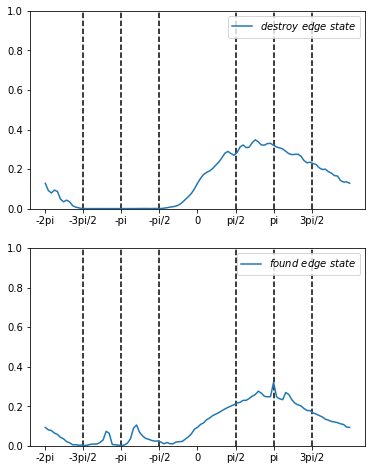

In [62]:
plt.figure(figsize=(6,8))

plt.subplot(2,1,1)
plt.plot(theta_1, p1, label='$ destroy\ edge\ state$')
plt.ylim(top = 1,bottom = 0)
my_x_ticks = np.arange(-2*np.pi,2*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('-2pi','-3pi/2','-pi','-pi/2','0','pi/2','pi','3pi/2','2pi'))
plt.vlines(-3*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(-np.pi, 0, 1, linestyles = "dashed")
plt.vlines(-np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed")
plt.legend(loc='best') 

plt.subplot(2,1,2)
plt.plot(theta_1, p2, label='$ found\ edge\ state$')
plt.ylim(top = 1,bottom = 0)
my_x_ticks = np.arange(-2*np.pi,2*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('-2pi','-3pi/2','-pi','-pi/2','0','pi/2','pi','3pi/2','2pi'))
plt.vlines(-3*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(-np.pi, 0, 1, linestyles = "dashed")
plt.vlines(-np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed")
plt.legend(loc='best') 

# 边缘态建立3

In [2]:
def N_step_f(state, theta_1, theta_2, theta_3, N_1, N_2):
    for i in range(N_1):
        state = one_step(state, theta_1, theta_2)
    state_1 = state
    for i in range(N_2):
        state_1 = one_step(state_1, theta_1, theta_3)
    return state_1

## 初始区间为没有边缘态

In [35]:
M = 150

p1 = np.zeros(101)
# p2 = np.zeros(101)

up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M

down_state[0] = 1

theta_3 = np.linspace(-2*np.pi,2*np.pi,101)
theta_1 = -np.pi/2
theta_2 = np.pi/4

np.array(up_state)
np.array(down_state)
np.array(aux_state)
init_state = np.vstack((up_state, down_state, aux_state))

for i,theta in enumerate(theta_3):
    state1 = N_step_f(init_state, theta_1, theta_2, theta,  N_1=10, N_2=100)
#     state2 = N_step_F(init_state, theta, theta_2, chi, N_1=10, N_2=90)

    P1 = abs(state1[0])**2 + abs(state1[1])**2 + abs(state1[2])**2
#     P2 = abs(state2[0])**2 + abs(state2[1])**2 + abs(state2[2])**2
    
    p1[i] = P1[0] + P1[1] 
#     p2[i] = P2[0] + P2[1] 
    

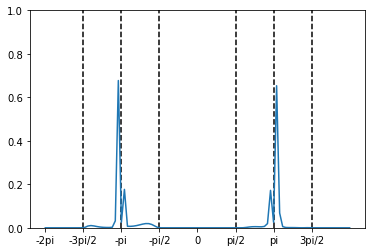

In [36]:
plt.plot(theta_3, p1)
plt.ylim(top = 1,bottom = 0)
my_x_ticks = np.arange(-2*np.pi,2*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('-2pi','-3pi/2','-pi','-pi/2','0','pi/2','pi','3pi/2','2pi'))
plt.vlines(-3*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(-np.pi, 0, 1, linestyles = "dashed")
plt.vlines(-np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed")
plt.savefig('sb')

## 初始区间不存在边缘态，可以发现无法建立单个边缘态

In [39]:
from ipywidgets import interact, interactive, fixed, interact_manual 
import ipywidgets as widgets 

import matplotlib.pyplot as plt 
%matplotlib inline 

import numpy as np 

M = 100

up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M
down_state[0] = 1

np.array(up_state)
np.array(down_state)
np.array(aux_state)
init_state = np.vstack((up_state, down_state, aux_state))

plt.figure()

def plot_func( theta_1, theta_2, theta_3,  n1, n2):
    n1 = int(n1)
    n2 = int(n2)
    state = N_step_f(init_state, theta_1, theta_2, theta_3, N_1=n1, N_2=n2)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2 
    phonon = np.arange(0, len(P)) 
    plt.bar(phonon ,P) 
    plt.xlim(0,50)
    plt.ylim(0,1)

interact(plot_func, theta_1 = widgets.FloatSlider(value=-np.pi/2, 
               min=-2*np.pi, 
               max=2*np.pi, 
               step=0.05*np.pi),theta_2 =widgets.FloatSlider(value=np.pi/4, 
               min=-2*np.pi, 
               max=2*np.pi, 
               step=0.01),theta_3 = widgets.FloatSlider(value=3*np.pi/4, 
               min=-2*np.pi,
               max=2*np.pi),n1 = widgets.FloatSlider(value=0, 
               min=0, 
               max=50, step=1),n2 = widgets.FloatSlider(value=0, 
               min=0, 
               max=100, step=1)) 
plt.show()

<Figure size 432x288 with 0 Axes>

interactive(children=(FloatSlider(value=-1.5707963267948966, description='theta_1', max=6.283185307179586, min…